### Voronyi-Stepan-Camp-2025
### Iris Dataset

In [11]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

np.random.seed(2021)

iris_data = load_iris()
print("data contains:", iris_data.keys())

features = iris_data.data
target = iris_data.target
feature_names = iris_data.feature_names
target_names = iris_data.target_names

df = pd.DataFrame(features, columns=feature_names)
df['target'] = target
label_mapping = dict(enumerate(target_names))
df['target_name'] = df['target'].map(label_mapping)
train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)

X_train = train_data[feature_names]
y_train = train_data['target']
X_test = test_data[feature_names]
y_test = test_data['target']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

best_k = None
best_accuracy = 0

for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    accuracy = model.score(X_test_scaled, y_test)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print('The best k = {}, score = {:.4f}'.format(best_k, best_accuracy))


data contains: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
The best k = 3, score = 1.0000


### Synthetic dataset

The best k: 5, score: 0.77


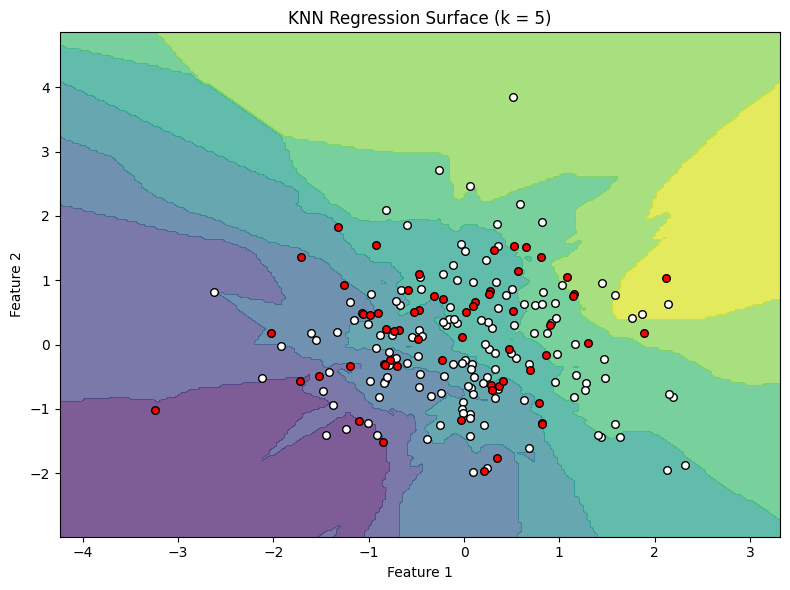

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

np.random.seed(2021)
X, y = make_regression(n_samples=200, n_features=2, noise=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

best_k = None
best_score = -np.inf
for k in range(1, 21):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    if score > best_score:
        best_score = score
        best_k = k

print(f"The best k: {best_k}, score: {best_score:.2f}")

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

model = KNeighborsRegressor(n_neighbors=best_k)
model.fit(X_train, y_train)
preds = model.predict(grid).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, preds, cmap='viridis', alpha=0.7)
plt.scatter(X_train[:, 0], X_train[:, 1], c='white', edgecolor='k', s=30)
plt.scatter(X_test[:, 0], X_test[:, 1], c='red', edgecolor='k', s=30)
plt.title(f'KNN Regression Surface (k = {best_k})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.tight_layout()
plt.show()
